In [1]:
# Import packages and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load the Wisconsin Breast Cancer dataset
WBCD = pd.read_csv('WisconsinBreastCancerDatabase.csv')

In [3]:
# Convert Diagnosis to 0 and 1
WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1

In [4]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

In [6]:
# Logistic regression predicting diagnosis from tumor radius
#Notice ravel for y but not X
#Sckit learn demands for X a 2-D matrix: each row a sample, each column a feature
#print(X[:5])
#It demands for y a vector
#print(np.ravel(y[:5]))
logisticModel = LogisticRegression();
logisticModel.fit(X_train, np.ravel(y_train.astype(int)));

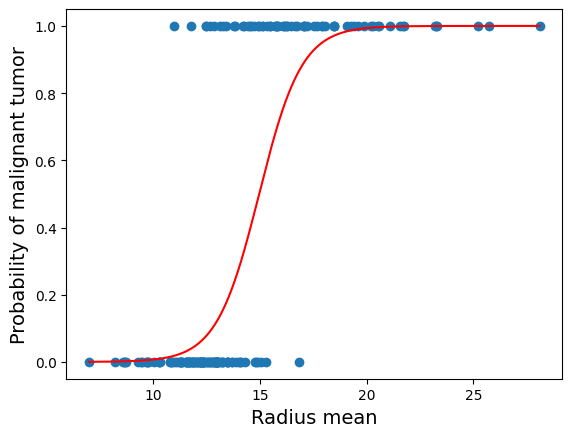

In [7]:
# Graph logistic regression probabilities
# This is a theoretical plot
plt.scatter(X_test, y_test)
x_prob = np.linspace(X_test.min(), X_test.max(), 1000)
y_prob = logisticModel.predict_proba(x_prob.reshape(-1, 1))[:, 1]
plt.plot(x_prob, y_prob, color='red')
plt.xlabel('Radius mean', fontsize=14);
plt.ylabel('Probability of malignant tumor', fontsize=14);

In [8]:
# Predict the probabilities for the test set
p_hat = logisticModel.predict_proba(X_test)

In [9]:
# Display the log-loss
metrics.log_loss(y_test, p_hat)

0.3134254604871014

In [ ]:
'''
Small is better than large.  O is parfect
Rule of thumb:
0.0 - 0.2 excellent
0.2 - 0.4 Good
0.4 - 0.6 not so good
> 0.6 awful
Notice -ln(0.5) = 0.693.  So 0.6 is only slightly better than chance